# Hyperparameter Sensitivity Study

Look at the hyper parameters gamma, tau, and learning rate over a few variations. How does the number of episodes to solve the task vary as those parameters vary. Study each hyperparameter independently, changing only that one particular value.

In [1]:
from train import outer_loop
import multiprocessing

In [2]:
def get_params():
    return {
        "REPLAY_BUFFER_SIZE": int(1e5),
        "BATCH_SIZE": 64,
        "GAMMA": 0.95,
        "TAU": 1e-2,
        "LEARNING_RATE": 1e-3,
        "UPDATE_TARGET_NET_STEPS": 4,
        "SEED": int(1234),
        "MODE": "TRAIN"
    }

In [3]:
study = {}

param = "GAMMA"
param_range = [0.9, 0.925, 0.95, 0.975, 0.995]
study[param] = param_range

param = "TAU"
param_range = [1e-1, 0.5e-1, 1e-2, 0.5e-2, 1e-3, 0.5e-3]
study[param] = param_range

param = "LEARNING_RATE"
param_range = [0.5e-2, 1e-3, 0.5e-3, 1e-4, 0.5e-4, 1e-5]
study[param] = param_range

In [4]:
multiprocessing.set_start_method('spawn')

for s in study:
    
    # reset parameters
    training_params = get_params()
    
    print(f"studying variable: {s}")
    
    for idx, param in enumerate(study[s]):
        
        print(f"studying parameter: {param}")

        training_params[s] = param
        
        print(f"training params: {training_params}")
        
        str_param = str(param).replace('.', '_')
        
        p = multiprocessing.Process(
            target=outer_loop,
            kwargs={
                'training_params':training_params,
                'model_name':f'model_{s}_{str_param}'
            }
        )
        
        p.start()
        p.join()

        #outer_loop(training_params=training_params, model_name=f'model_{s}_{str_param}')

studying variable: GAMMA
studying parameter: 0.9
training params: {'REPLAY_BUFFER_SIZE': 100000, 'BATCH_SIZE': 64, 'GAMMA': 0.9, 'TAU': 0.01, 'LEARNING_RATE': 0.001, 'UPDATE_TARGET_NET_STEPS': 4, 'SEED': 1234}
studying parameter: 0.925
training params: {'REPLAY_BUFFER_SIZE': 100000, 'BATCH_SIZE': 64, 'GAMMA': 0.925, 'TAU': 0.01, 'LEARNING_RATE': 0.001, 'UPDATE_TARGET_NET_STEPS': 4, 'SEED': 1234}
studying parameter: 0.95
training params: {'REPLAY_BUFFER_SIZE': 100000, 'BATCH_SIZE': 64, 'GAMMA': 0.95, 'TAU': 0.01, 'LEARNING_RATE': 0.001, 'UPDATE_TARGET_NET_STEPS': 4, 'SEED': 1234}
studying parameter: 0.975
training params: {'REPLAY_BUFFER_SIZE': 100000, 'BATCH_SIZE': 64, 'GAMMA': 0.975, 'TAU': 0.01, 'LEARNING_RATE': 0.001, 'UPDATE_TARGET_NET_STEPS': 4, 'SEED': 1234}
studying parameter: 0.995
training params: {'REPLAY_BUFFER_SIZE': 100000, 'BATCH_SIZE': 64, 'GAMMA': 0.995, 'TAU': 0.01, 'LEARNING_RATE': 0.001, 'UPDATE_TARGET_NET_STEPS': 4, 'SEED': 1234}
studying variable: TAU
studying para

In [27]:
import json
import glob
import matplotlib.pyplot as plt

In [15]:
def load_json_study_output(glob_str):
    with open(glob.glob(glob_str)[0], 'r') as f:
        return json.loads(f.read())

## GAMMA

In [16]:
gamma_data = [
    load_json_study_output("model_GAMMA_0_9_*.json"),
    load_json_study_output("model_GAMMA_0_925_*.json"),
    load_json_study_output("model_GAMMA_0_95_*.json"),
    load_json_study_output("model_GAMMA_0_975_*.json"),
    load_json_study_output("model_GAMMA_0_995_*.json"),
]

In [20]:
gamma_episodes_to_complete = [gd["episodes"] for gd in gamma_data]

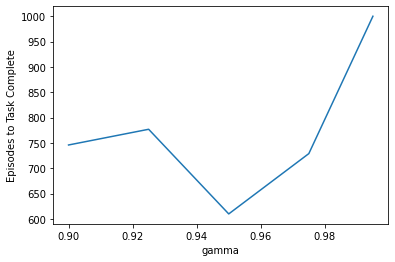

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(study["GAMMA"], gamma_episodes_to_complete)
plt.ylabel('Episodes to Task Complete')
plt.xlabel('gamma')
plt.show()

## TAU

In [30]:
tau_data = [
    load_json_study_output("model_TAU_0_0005_*.json"),
    load_json_study_output("model_TAU_0_001_*.json"),
    load_json_study_output("model_TAU_0_005_*.json"),
    load_json_study_output("model_TAU_0_01_*.json"),
    load_json_study_output("model_TAU_0_05_*.json"),
    load_json_study_output("model_TAU_0_1_*.json"),
]

In [34]:
tau_episodes_to_complete = [td["episodes"] for td in tau_data]

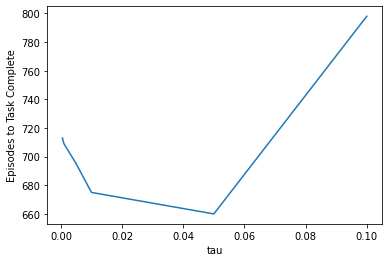

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(study["TAU"], tau_episodes_to_complete)
plt.ylabel('Episodes to Task Complete')
plt.xlabel('tau')
plt.show()

## Learning Rate

In [59]:
lr_data = [
    load_json_study_output("model_LEARNING_RATE_0_0001_*.json"),
    load_json_study_output("model_LEARNING_RATE_0_0005_*.json"),
    load_json_study_output("model_LEARNING_RATE_0_001_*.json"),
    load_json_study_output("model_LEARNING_RATE_0_005_*.json"),
    load_json_study_output("model_LEARNING_RATE_1e-05_*.json"),
    load_json_study_output("model_LEARNING_RATE_5e-05_*.json"),
]

In [60]:
lr_episodes_to_complete = [lr["episodes"] for lr in lr_data]

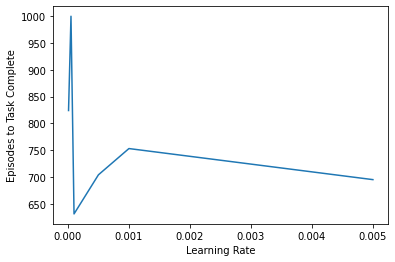

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(study["LEARNING_RATE"], lr_episodes_to_complete)
plt.ylabel('Episodes to Task Complete')
plt.xlabel('Learning Rate')
plt.show()